In [2]:
import os
import math
import random
# import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from glob import glob

In [3]:
# Reading the data from HAM_metadata.csv
skin_df = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
skin_df = skin_df[['image_id', 'dx']]

In [4]:
skin_df

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl
...,...,...
10010,ISIC_0033084,akiec
10011,ISIC_0033550,akiec
10012,ISIC_0033536,akiec
10013,ISIC_0032854,akiec


In [5]:
skin_df.dtypes

image_id    object
dx          object
dtype: object

In [6]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = '../input/skin-cancer-mnist-ham10000'
 
# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [7]:
# Create new columns for readability

skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [8]:
cell_type_idx_mapping = dict(zip(skin_df['cell_type_idx'], skin_df['cell_type']))

In [9]:
skin_df.head()

,image_id,dx,path,cell_type,cell_type_idx
0,ISIC_0027419,bkl,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
1,ISIC_0025030,bkl,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
2,ISIC_0026769,bkl,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
3,ISIC_0025661,bkl,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2
4,ISIC_0031633,bkl,../input/skin-cancer-mnist-ham10000/ham10000_i...,Benign keratosis-like lesions,2


In [10]:
np.sum(skin_df.isna())

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


image_id         0
dx               0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [11]:
cell_type_mapping = dict(zip(skin_df['cell_type'], skin_df['cell_type_idx']))

# Print the mapping
for cell_type, idx in cell_type_mapping.items():
    print(f"{cell_type},\t\tIndex: {idx}")

Benign keratosis-like lesions ,		Index: 2
Melanocytic nevi,		Index: 4
Dermatofibroma,		Index: 3
Melanoma,		Index: 5
Vascular lesions,		Index: 6
Basal cell carcinoma,		Index: 1
Actinic keratoses,		Index: 0


# Data preprocessing

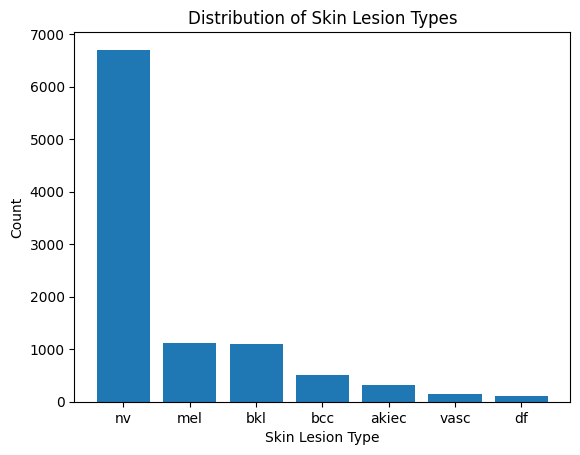

In [12]:
# Plot distribution of skin lesion types

n_samples_by_types = skin_df['dx'].value_counts()
types = lesion_type_dict.values()

plt.bar(n_samples_by_types.index, n_samples_by_types.values)
plt.xlabel('Skin Lesion Type')
plt.ylabel('Count')

plt.title('Distribution of Skin Lesion Types')

plt.show()

# Load and resize image

In [13]:
SIZE = 128
CHANNELS = 3

# Handling Imbalanced Data

In [14]:
from sklearn.utils import resample


df_0 = skin_df[skin_df['dx'] == 'nv']
df_1 = skin_df[skin_df['dx'] == 'mel']
df_2 = skin_df[skin_df['dx'] == 'bkl']
df_3 = skin_df[skin_df['dx'] == 'bcc']
df_4 = skin_df[skin_df['dx'] == 'akiec']
df_5 = skin_df[skin_df['dx'] == 'vasc']
df_6 = skin_df[skin_df['dx'] == 'df']

n_samples=800 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)


# df_0_balanced = resample(df_0, replace=False, n_samples=2000, random_state=42) 
# df_1_balanced = resample(df_1, replace=False, n_samples=1000, random_state=42) 
# df_2_balanced = resample(df_2, replace=False, n_samples=1000, random_state=42)
# df_3_balanced = resample(df_3, replace=False, n_samples=500, random_state=42)
# df_4_balanced = resample(df_4, replace=False, n_samples=300, random_state=42)
# df_5_balanced = resample(df_5, replace=False, n_samples=100, random_state=42)
# df_6_balanced = resample(df_6, replace=False, n_samples=100, random_state=42)

#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [15]:
skin_df_balanced

,image_id,dx,path,cell_type,cell_type_idx
3835,ISIC_0030099,nv,../input/skin-cancer-mnist-ham10000/ham10000_i...,Melanocytic nevi,4
8367,ISIC_0030654,nv,../input/skin-cancer-mnist-ham10000/ham10000_i...,Melanocytic nevi,4
8203,ISIC_0032347,nv,../input/skin-cancer-mnist-ham10000/ham10000_i...,Melanocytic nevi,4
8168,ISIC_0027285,nv,../input/skin-cancer-mnist-ham10000/ham10000_i...,Melanocytic nevi,4
6747,ISIC_0026251,nv,../input/skin-cancer-mnist-ham10000/ham10000_i...,Melanocytic nevi,4
...,...,...,...,...,...
1155,ISIC_0028735,df,../input/skin-cancer-mnist-ham10000/ham10000_i...,Dermatofibroma,3
1202,ISIC_0027044,df,../input/skin-cancer-mnist-ham10000/ham10000_i...,Dermatofibroma,3
1148,ISIC_0029962,df,../input/skin-cancer-mnist-ham10000/ham10000_i...,Dermatofibroma,3
1133,ISIC_0029578,df,../input/skin-cancer-mnist-ham10000/ham10000_i...,Dermatofibroma,3


In [ ]:
skin_df.shape

In [16]:
from skimage import feature
import cv2

def compute_hog_features1(image):
    """ Tính đặc trưng HOG cho một ảnh. """
    channel_1 = image[:, :, 0]
    channel_2 = image[:, :, 1]
    channel_3 = image[:, :, 2]

    hog_features_1 = feature.hog(cv2.resize(channel_1, (128, 128)), orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    hog_features_2 = feature.hog(cv2.resize(channel_2, (128, 128)), orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    hog_features_3 = feature.hog(cv2.resize(channel_3, (128, 128)), orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

    hog_features_combined = np.hstack((hog_features_1, hog_features_2, hog_features_3))
    return hog_features_combined

In [17]:
from multiprocessing import Pool
from PIL import Image

def load_resized_image(image_path):
        image = Image.open(image_path)
        resized_image = image.resize((SIZE, SIZE))
        return compute_hog_features1(np.asarray(resized_image))
#         return np.asarray(resized_image)


def load_images_parallel(paths):
    """Loads and resizes images in parallel using multiprocessing."""
    with Pool() as p:
        images = p.map(load_resized_image, paths)

    return images

In [ ]:
# test = skin_df.sample(n=100)

In [ ]:
# test

In [18]:
# images = load_images_parallel(skin_df['path'])

In [18]:
images = load_images_parallel(skin_df_balanced['path'])

In [23]:
images[0].shape

(24300,)

ISIC_0027419 bkl


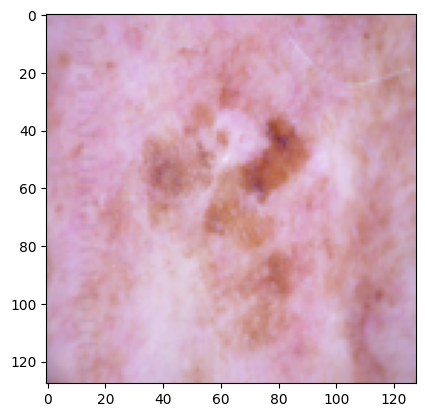

In [19]:
import matplotlib.pyplot as plt
id = 0
print(skin_df['image_id'].iloc[id], skin_df['dx'].iloc[id])
im = images[id]
plt.imshow(im)

# Normalize data and convert labels to one-hot vectors

In [19]:
# X = np.asarray(skin_df_balanced['image'].tolist())
X = np.asarray(images)
print(X.shape)
X = X / 255

(5600, 24300)


In [20]:
from keras.utils import to_categorical

# y = skin_df['cell_type_idx']
y = skin_df_balanced['cell_type_idx']
y_cat = to_categorical(y, num_classes=7)
y_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Train test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.2, random_state=42)

In [22]:
input_shape = (SIZE, SIZE, CHANNELS)
n_classes = 7

# Visualize

In [ ]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
    # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img(skin_df['path'][0], target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
        # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
# show the figure
pyplot.show()

# Feat Extractor

In [23]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

In [24]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(X)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*4*4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [27]:
from sklearn.model_selection import train_test_split
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [ ]:
y_train

In [28]:
# Define the callbacks
best_weight_filepath = "/kaggle/working/best_weight.weights.h5"

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Grid search để tìm các parameter tốt nhất cho model. C = 1/lamda, hệ số trong regularisation. Solver là kiểu optimize
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
params = {'C' : [0.1, 1.0, 10.0, 100.0]}
model = GridSearchCV(LogisticRegression(multi_class='multinomial'), params)
model.fit(X_train, y_train)
print('Best parameter for the model {}'.format(model.best_params_))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameter for the model {'C': 0.1}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report
# Đánh giá model
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.33      0.25      0.28        69
           1       0.61      0.55      0.58        93
           2       0.48      0.40      0.44       228
           3       0.60      0.11      0.18        28
           4       0.83      0.91      0.87      1338
           5       0.45      0.38      0.41       226
           6       0.70      0.33      0.45        21

    accuracy                           0.74      2003
   macro avg       0.57      0.42      0.46      2003
weighted avg       0.71      0.74      0.72      2003



# Finetuning

In [31]:
# Thêm thư viện
from sklearn.metrics import classification_report
from keras.applications import VGG16
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
import numpy as np
import random
import os
from keras.metrics import Precision, Recall, Accuracy

In [32]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
baseModel = VGG16(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

# Xây thêm các layer
# Lấy output của ConvNet trong VGG16
fcHead = baseModel.output

# Flatten trước khi dùng FCs
fcHead = Flatten(name='flatten')(fcHead)

# Thêm FC
fcHead = Dense(256, activation='relu')(fcHead)
fcHead = Dropout(0.5)(fcHead)

# Output layer với softmax activation
fcHead = Dense(7, activation='softmax')(fcHead)

# Xây dựng model bằng việc nối ConvNet của VGG16 và fcHead
model = Model(inputs=baseModel.input, outputs=fcHead)

In [33]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,895 (64.14 MB)

 Trainable params: 16,813,895 (64.14 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# augmentation cho training data
aug_train = ImageDataGenerator(rescale=1./255, channel_shift_range=5, vertical_flip=True,
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# augementation cho test
aug_test= ImageDataGenerator(rescale=1./255)

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
best_weight_filepath = "/kaggle/working/best_weight.weights.h5"

checkpoint = ModelCheckpoint(
    filepath=best_weight_filepath,
    monitor="val_loss",  # monitor metric to determine 'best'
    save_best_only=True,
    save_weights_only=True,  # save only weights, not full model
)

In [ ]:
y_train.shape

In [38]:
# freeze VGG model
for layer in baseModel.layers:
    layer.trainable = False

optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
numOfEpoch = 10

# model.fit(aug_train.flow(X_train, y_train, batch_size=32), 
#                         steps_per_epoch=len(X_train)//32,
#                         validation_data=(aug_test.flow(X_test, y_test, batch_size=32)),
#                         validation_steps=len(X_test)//32,
#                         epochs=numOfEpoch)
model.fit(X_train, y_train, batch_size=32, 
                        steps_per_epoch=len(X_train)//32,
                        validation_split=0.25,
                        validation_steps=len(X_test)//32,
                        epochs=numOfEpoch,
                        callbacks=[checkpoint])

Epoch 1/10
  4/250 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.4128 - loss: 1.7345

W0000 00:00:1715362247.152429     183 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/250 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.6477 - loss: 1.1184

W0000 00:00:1715362268.077260     183 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
W0000 00:00:1715362270.163477     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - accuracy: 0.6546 - loss: 1.0926 - val_accuracy: 0.7082 - val_loss: 0.8550
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.6939 - loss: 0.8956 - val_accuracy: 0.6842 - val_loss: 0.8604
Epoch 3/10
  3/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6771 - loss: 1.0024

W0000 00:00:1715362289.601354     184 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.7007 - loss: 0.8770 - val_accuracy: 0.7268 - val_loss: 0.8038
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7158 - loss: 0.8260 - val_accuracy: 0.7895 - val_loss: 0.8540
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.7284 - loss: 0.7956 - val_accuracy: 0.7334 - val_loss: 0.7722
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7325 - loss: 0.7778 - val_accuracy: 0.6842 - val_loss: 0.9076
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7448 - loss: 0.7538 - val_accuracy: 0.7440 - val_loss: 0.7493
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.7464 - loss: 0.7315 - val_accuracy: 0.7895 - val_loss: 0.9124
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7429 - loss: 0.7439 - val_accuracy: 0.7525 - val_loss: 0.7324
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.7577 - loss: 0.6998 - val_accuracy: 

In [39]:
# unfreeze some last CNN layer:
for layer in baseModel.layers[15:]:
    layer.trainable = True

numOfEpoch = 25
optimizer = SGD(0.001)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# model.fit(aug_train.flow(X_train, y_train, batch_size=32), 
#                         steps_per_epoch=len(X_train)//32,
#                         validation_data=(aug_test.flow(X_test, y_test, batch_size=32)),
#                         validation_steps=len(X_test)//32,
#                         epochs=numOfEpoch)

model.fit(X_train, y_train, batch_size=32, 
                        steps_per_epoch=len(X_train)//32,
                        validation_split=0.25,
                        validation_steps=len(X_test)//32,
                        epochs=numOfEpoch,
                        callbacks=[checkpoint])

Epoch 1/25
  4/250 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.8223 - loss: 0.5866

W0000 00:00:1715362645.879884     183 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/250 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7566 - loss: 0.6811

W0000 00:00:1715362658.500643     183 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715362660.169832     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7573 - loss: 0.6817 - val_accuracy: 0.7455 - val_loss: 0.7340
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7777 - loss: 0.6389 - val_accuracy: 0.7895 - val_loss: 0.8775
Epoch 3/25


W0000 00:00:1715362673.228340     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.7753 - loss: 0.6255 - val_accuracy: 0.7591 - val_loss: 0.6770
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7828 - loss: 0.5996 - val_accuracy: 0.7895 - val_loss: 0.9188
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.7953 - loss: 0.5740 - val_accuracy: 0.7712 - val_loss: 0.6817
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7884 - loss: 0.5775 - val_accuracy: 0.7368 - val_loss: 0.8847
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8098 - loss: 0.5389 - val_accuracy: 0.7792 - val_loss: 0.6749
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8211 - loss: 0.5103 - val_accuracy: 0.7368 - val_loss: 0.9297
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8140 - loss: 0.5176 - val_accuracy: 0.7560 - val_loss: 0.6742
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8279 - loss: 0.4878 - val_accuracy:

In [40]:
last_weight_filepath = "/kaggle/working/last_weight.weights.h5"
model.save_weights(last_weight_filepath)

In [41]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7351 - loss: 0.7669


[0.7337510585784912, 0.7438841462135315]

In [ ]:
last_weight_filepath = "/kaggle/working/last_weight.weights.h5"
best_weight_filepath = "/kaggle/working/best_weight.weights.h5"

In [42]:
sorted_dict = dict(sorted(cell_type_idx_mapping.items()))

In [43]:
import numpy as np
from keras import backend as K
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

model.load_weights(last_weight_filepath)
predictions = model.predict(X_test)

num_classes = predictions.shape[1]  # Assuming predictions are already one-hot encoded

predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

 4/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step

W0000 00:00:1715363213.591855     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


W0000 00:00:1715363216.896470     184 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [44]:
report = classification_report(y_test, predictions, target_names=sorted_dict.values())

In [45]:
print(report)

                                precision    recall  f1-score   support

             Actinic keratoses       0.38      0.07      0.12        69
          Basal cell carcinoma       0.77      0.47      0.59        93
Benign keratosis-like lesions        0.53      0.32      0.40       228
                Dermatofibroma       1.00      0.04      0.07        28
              Melanocytic nevi       0.85      0.91      0.88      1338
                      Melanoma       0.39      0.59      0.47       226
              Vascular lesions       0.68      0.62      0.65        21

                      accuracy                           0.74      2003
                     macro avg       0.66      0.43      0.45      2003
                  weighted avg       0.74      0.74      0.73      2003



# Model VGG16 Training

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights=None, include_top=True, input_shape=input_shape, classes=n_classes)

In [ ]:
model.summary()

In [ ]:
from keras.metrics import Precision, Recall, Accuracy
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', Precision(), Recall()])

In [ ]:
batch_size = 64
numOfEpoch = 35

In [ ]:
# Define the checkpoint callback
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
best_weight_filepath = "/kaggle/working/best_weight.weights.h5"

checkpoint = ModelCheckpoint(
    filepath=best_weight_filepath,
    monitor="val_loss",  # monitor metric to determine 'best'
    save_best_only=True,
    save_weights_only=True,  # save only weights, not full model
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# augmentation cho training data
aug_train = ImageDataGenerator(vertical_flip=True,zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


# augementation cho test
aug_test= ImageDataGenerator()

In [ ]:
his = model.fit(aug_train.flow(X_train, y_train, batch_size=batch_size), 
                        steps_per_epoch=len(X_train)//batch_size,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=batch_size)),
                        callbacks=[checkpoint],
                        validation_steps=len(X_test)//batch_size,
                        epochs=numOfEpoch)

In [ ]:
# !rm -rf /kaggle/working/*

In [ ]:
# his = model.fit(X_train, y_train, batch_size=batch_size, epochs=numOfEpoch, callbacks=[checkpoint], validation_split=0.25)

In [ ]:
last_weight_filepath = "/kaggle/working/last_weight.weights.h5"
model.save_weights(last_weight_filepath)

# Evaluate

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
last_weight_filepath = "/kaggle/working/last_weight.weights.h5"
best_weight_filepath = "/kaggle/working/best_weight.weights.h5"

In [ ]:
sorted_dict = dict(sorted(cell_type_idx_mapping.items()))

In [ ]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(his.history['recall'])
plt.plot(his.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# precision
plt.plot(his.history['precision'])
plt.plot(his.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from keras import backend as K
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

model.load_weights(last_weight_filepath)
predictions = model.predict(X_test)

num_classes = predictions.shape[1]  # Assuming predictions are already one-hot encoded

predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
report = classification_report(y_test, predictions, target_names=sorted_dict.values())

In [ ]:
print(report)

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
sorted_dict = dict(sorted(cell_type_idx_mapping.items()))

In [34]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=sorted_dict.values())
print(report)

                                precision    recall  f1-score   support

             Actinic keratoses       1.00      0.86      0.92       174
          Basal cell carcinoma       1.00      0.70      0.82       161
Benign keratosis-like lesions        1.00      0.48      0.65       139
                Dermatofibroma       1.00      0.99      0.99       151
              Melanocytic nevi       1.00      0.09      0.16       170
                      Melanoma       1.00      0.44      0.61       162
              Vascular lesions       1.00      0.99      1.00       163

                     micro avg       1.00      0.65      0.79      1120
                     macro avg       1.00      0.65      0.74      1120
                  weighted avg       1.00      0.65      0.73      1120
                   samples avg       0.65      0.65      0.65      1120



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [29]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
sorted_dict = dict(sorted(cell_type_idx_mapping.items()))

In [31]:
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred, target_names=sorted_dict.values())
print(report)

                                precision    recall  f1-score   support

             Actinic keratoses       0.94      0.60      0.73       174
          Basal cell carcinoma       0.78      0.39      0.52       161
Benign keratosis-like lesions        0.41      0.56      0.47       139
                Dermatofibroma       0.37      0.97      0.54       151
              Melanocytic nevi       0.52      0.15      0.24       170
                      Melanoma       0.73      0.19      0.30       162
              Vascular lesions       0.89      0.93      0.91       163

                     micro avg       0.58      0.53      0.55      1120
                     macro avg       0.66      0.54      0.53      1120
                  weighted avg       0.67      0.53      0.53      1120
                   samples avg       0.53      0.53      0.53      1120



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [35]:
from sklearn import svm
from sklearn.metrics import classification_report
svm_model = svm.SVC(kernel='poly')  # Bạn có thể thử các kernel khác như 'rbf', 'poly', etc.

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [36]:
sorted_dict = dict(sorted(cell_type_idx_mapping.items()))

In [37]:
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=sorted_dict.values())
print(report)

                                precision    recall  f1-score   support

             Actinic keratoses       0.86      0.91      0.88       174
          Basal cell carcinoma       0.82      0.72      0.77       161
Benign keratosis-like lesions        0.55      0.66      0.60       139
                Dermatofibroma       0.99      0.99      0.99       151
              Melanocytic nevi       0.69      0.62      0.65       170
                      Melanoma       0.72      0.70      0.71       162
              Vascular lesions       0.98      0.99      0.98       163

                      accuracy                           0.80      1120
                     macro avg       0.80      0.80      0.80      1120
                  weighted avg       0.80      0.80      0.80      1120

